
# 🧼 Notebook 2 — Prétraitement des données (Data Preprocessing)
Dans ce notebook, nous allons préparer les images pour l'entraînement du modèle Xception. L'objectif est d'homogénéiser, normaliser et améliorer la qualité des données pour de meilleures performances en deep learning.

# 📌 1. Imports et paramètres

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

IMG_SIZE = (299, 299)
BATCH_SIZE = 32
DATASET_DIR = "dataset"

# 1. Création du dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_DIR}/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True,   # Mélange les images
    seed=42         # Fixe la graine pour que le mélange soit toujours le même
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_DIR}/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_DIR}/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=False
)

# Récupération des noms de classes
class_names = train_ds.class_names
print("Classes détectées :", class_names)

Found 4900 files belonging to 2 classes.
Found 1050 files belonging to 2 classes.
Found 1050 files belonging to 2 classes.
Found 1050 files belonging to 2 classes.
Classes détectées : ['NORMAL', 'PNEUMONIA']
Found 1050 files belonging to 2 classes.
Classes détectées : ['NORMAL', 'PNEUMONIA']


# Application de la normalisation spécifique à Xception  
  
On applique la fonction preprocess_input qui normalise les pixels entre -1 et 1

In [2]:
def preprocess(images, labels):
    images = preprocess_input(images)
    return images, labels

train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)


# Optimisation du pipeline
Préchargement des données pour accélérer l’entraînement

In [3]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# Vérification visuelle des images prétraitées
  
On affiche quelques images pour vérifier que tout est correct

On "dénormalise" les pixels pour l’affichage (remise entre 0 et 1)

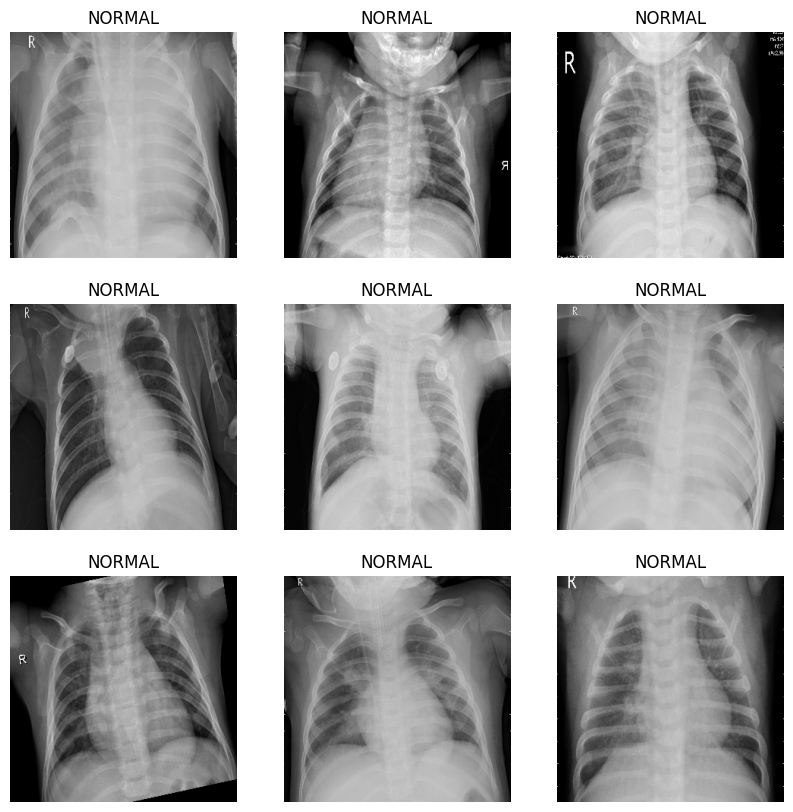

In [4]:
def show_images(dataset, class_names, num_images=9):
    plt.figure(figsize=(10,10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            img = images[i].numpy()
            img = (img + 1.0) / 2.0  # dénormalisation
            plt.imshow(img)
            label = class_names[np.argmax(labels[i])]
            plt.title(label)
            plt.axis('off')
    plt.show()

show_images(train_ds, class_names)


## Ce qui est fait dans ce préprocessing

Chargement des images depuis les dossiers train/val/test

Redimensionnement à 299x299 pixels

Conversion en RGB (automatique avec image_dataset_from_directory)

Normalisation spécifique à Xception (pixels entre -1 et 1 via preprocess_input)

Optimisation du pipeline avec .prefetch()

Visualisation des images prétraitées